<a href="https://colab.research.google.com/github/KavinduJ2001/Assignment_A03/blob/main/AssignmentA03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN3160 Assignment 3 on Neural Networks

# Question 01

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0315605145692825
Epoch 2/10, Loss: 1.7779901214838028
Epoch 3/10, Loss: 1.6950977506637572
Epoch 4/10, Loss: 1.6448932602405548
Epoch 5/10, Loss: 1.6057078835964202
Epoch 6/10, Loss: 1.5706600705385207
Epoch 7/10, Loss: 1.539998669743538
Epoch 8/10, Loss: 1.5142454254627227
Epoch 9/10, Loss: 1.490227084994316
Epoch 10/10, Loss: 1.4684715609550476


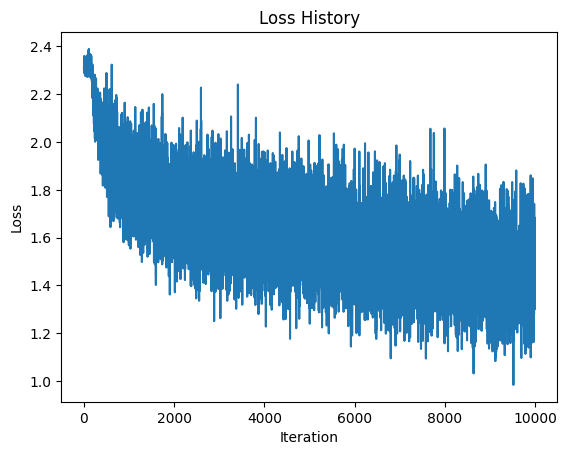

Training accuracy: 50.21%
Test accuracy: 47.31%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
Dhidden = 100  # Number of nodes in the hidden layer
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, Dhidden) * std  # Input to hidden layer weights
b1 = torch.zeros(Dhidden)  # Hidden layer biases
w2 = torch.randn(Dhidden, K) * std  # Hidden to output layer weights
b2 = torch.zeros(K)  # Output layer biases

# Hyperparameters
iterations = 10
lr = 0.002  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        h = x_train.mm(w1) + b1  # Hidden layer activation
        h_sigmoid = torch.sigmoid(h)  # Apply sigmoid activation
        y_pred = h_sigmoid.mm(w2) + b2  # Output layer activation

        # Loss calculation (Cross-Entropy Loss with regularization)
        loss = nn.functional.cross_entropy(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = nn.functional.softmax(y_pred, dim=1) - y_train_onehot
        dh_sigmoid = dy_pred.mm(w2.t())
        dh = dh_sigmoid * h_sigmoid * (1 - h_sigmoid)  # Derivative of sigmoid

        dw2 = h_sigmoid.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dw1 = x_train.t().mm(dh) + reg * w1
        db1 = dh.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        h = x_train.mm(w1) + b1
        h_sigmoid = torch.sigmoid(h)
        y_train_pred = h_sigmoid.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        h = x_test.mm(w1) + b1
        h_sigmoid = torch.sigmoid(h)
        y_test_pred = h_sigmoid.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


# Question 02


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.78MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.37MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



[1, 100] loss: 1.127
[1, 200] loss: 0.299
[1, 300] loss: 0.211
[1, 400] loss: 0.171
[1, 500] loss: 0.140
[1, 600] loss: 0.127
[1, 700] loss: 0.104
[1, 800] loss: 0.094
[1, 900] loss: 0.085
[2, 100] loss: 0.079
[2, 200] loss: 0.088
[2, 300] loss: 0.071
[2, 400] loss: 0.074
[2, 500] loss: 0.060
[2, 600] loss: 0.065
[2, 700] loss: 0.065
[2, 800] loss: 0.066
[2, 900] loss: 0.075
[3, 100] loss: 0.050
[3, 200] loss: 0.051
[3, 300] loss: 0.049
[3, 400] loss: 0.054
[3, 500] loss: 0.048
[3, 600] loss: 0.047
[3, 700] loss: 0.057
[3, 800] loss: 0.053
[3, 900] loss: 0.041
[4, 100] loss: 0.037
[4, 200] loss: 0.034
[4, 300] loss: 0.042
[4, 400] loss: 0.038
[4, 500] loss: 0.041
[4, 600] loss: 0.040
[4, 700] loss: 0.042
[4, 800] loss: 0.040
[4, 900] loss: 0.044
[5, 100] loss: 0.029
[5, 200] loss: 0.031
[5, 300] loss: 0.024
[5, 400] loss: 0.035
[5, 500] loss: 0.037
[5, 600] loss: 0.027
[5, 700] loss: 0.035
[5, 800] loss: 0.043
[5, 900] loss: 0.033
[6, 100] loss: 0.024
[6, 200] loss: 0.030
[6, 300] loss

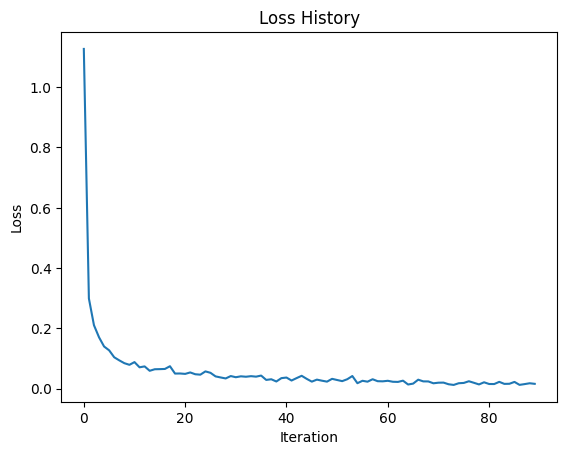

Training accuracy: 99.41%
Test accuracy: 98.66%


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training Loop
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            loss_history.append(running_loss / 100)
            running_loss = 0.0

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


# Question 03

In [14]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

# Mounting Google Drive

In [16]:
#https://drive.google.com/drive/folders/1UKJxAsTLR8DcbvpvTD1xS5l53oCddBE9?usp=share_link
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load Data

In [17]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/Image - Assignment03/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Training the model

In [19]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

# Visualizing the model predictions

In [20]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# Finetuning the ConvNet

In [ ]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train and evaluate

In [22]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7452 Acc: 0.6434
val Loss: 0.1757 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.5685 Acc: 0.7787
val Loss: 0.2916 Acc: 0.8758

Epoch 2/24
----------
train Loss: 0.5510 Acc: 0.7910
val Loss: 0.5539 Acc: 0.8235

Epoch 3/24
----------
train Loss: 0.6594 Acc: 0.7746
val Loss: 0.3220 Acc: 0.8758

Epoch 4/24
----------
train Loss: 0.4484 Acc: 0.8033
val Loss: 0.2550 Acc: 0.9085

Epoch 5/24
----------
train Loss: 0.2780 Acc: 0.8648
val Loss: 0.2332 Acc: 0.9085

Epoch 6/24
----------
train Loss: 0.5375 Acc: 0.8033
val Loss: 0.2902 Acc: 0.8497

Epoch 7/24
----------
train Loss: 0.4895 Acc: 0.8197
val Loss: 0.2727 Acc: 0.8758

Epoch 8/24
----------
train Loss: 0.2975 Acc: 0.8852
val Loss: 0.2343 Acc: 0.8954

Epoch 9/24
----------
train Loss: 0.3919 Acc: 0.8238
val Loss: 0.2258 Acc: 0.9085

Epoch 10/24
----------
train Loss: 0.2775 Acc: 0.8689
val Loss: 0.2290 Acc: 0.8889

Epoch 11/24
----------
train Loss: 0.3324 Acc: 0.8689
val Loss: 0.2043 Acc: 0.9216

Ep

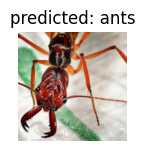

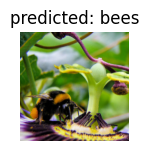

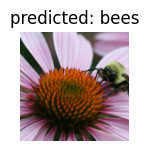

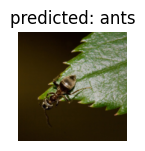

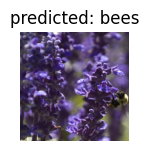

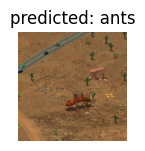

In [23]:
visualize_model(model_ft)

# ConvNet as fixed feature extractor

In [24]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train and evaluate

In [25]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6182 Acc: 0.6598
val Loss: 0.3974 Acc: 0.8301

Epoch 1/24
----------
train Loss: 0.5222 Acc: 0.7582
val Loss: 0.2129 Acc: 0.9281

Epoch 2/24
----------
train Loss: 0.5665 Acc: 0.7459
val Loss: 0.3330 Acc: 0.8693

Epoch 3/24
----------
train Loss: 0.5687 Acc: 0.7869
val Loss: 0.2831 Acc: 0.8889

Epoch 4/24
----------
train Loss: 0.4063 Acc: 0.8197
val Loss: 0.1927 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.3717 Acc: 0.8443
val Loss: 0.1442 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.4509 Acc: 0.7869
val Loss: 0.3927 Acc: 0.8431

Epoch 7/24
----------
train Loss: 0.5279 Acc: 0.8033
val Loss: 0.1739 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.3155 Acc: 0.8648
val Loss: 0.1687 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.3816 Acc: 0.8320
val Loss: 0.1517 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3999 Acc: 0.8443
val Loss: 0.1534 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.3178 Acc: 0.8689
val Loss: 0.1605 Acc: 0.9412

Ep

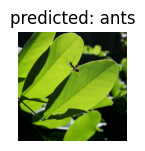

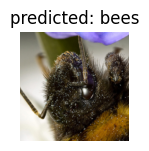

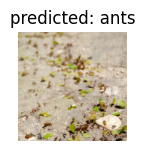

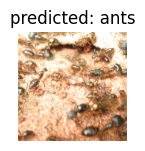

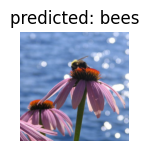

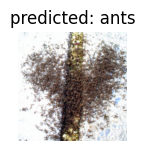

In [26]:
visualize_model(model_conv)

plt.ioff()
plt.show()